In [2]:
# Step 1: Install and import the necessary libraries
!pip install -q pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [20]:
# Step 2: Load the uploaded CSV file from Colab's file system
import pandas as pd

# Replace the filename below with your actual file name
df = pd.read_csv('/content/Phishing_Email.csv')

# Show the first few rows
df.head()


<ipython-input-20-eba38e4b7acc>:5: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Phishing_Email.csv')


,Email Text,Email Type,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,the other side of * galicismos * * galicismo *...,Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,re : equistar deal tickets are you still avail...,Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,software at incredibly low prices ( 86 % lower...,Phishing Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Step 3: Clean and preprocess the dataset

import pandas as pd

# Load the CSV with special handling (if not already done)
df = pd.read_csv('/content/Phishing_Email.csv')

# Rename columns to simplify access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display column names
print("Columns:", df.columns)

# Drop rows where either 'email_text' or 'email_type' is missing
df = df.dropna(subset=['email_text', 'email_type'])

# Convert email types to binary labels
df['label'] = df['email_type'].apply(lambda x: 1 if 'phishing' in x.lower() else 0)

# Keep only useful columns
df = df[['email_text', 'label']]

# Drop empty text rows (if any)
df = df[df['email_text'].str.strip() != ""]

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview cleaned dataset
df.head()


<ipython-input-22-5c86e309e936>:6: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Phishing_Email.csv')


Columns: Index(['email_text', 'email_type', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4',
       'unnamed:_5', 'unnamed:_6', 'unnamed:_7', 'unnamed:_8', 'unnamed:_9',
       ...
       'unnamed:_16374', 'unnamed:_16375', 'unnamed:_16376', 'unnamed:_16377',
       'unnamed:_16378', 'unnamed:_16379', 'unnamed:_16380', 'unnamed:_16381',
       'unnamed:_16382', 'unnamed:_16383'],
      dtype='object', length=16384)


<ipython-input-22-5c86e309e936>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['email_type'].apply(lambda x: 1 if 'phishing' in x.lower() else 0)


,email_text,label
0,miracle protein for immune system ' the antido...,1
1,clean draft of press release attached is a cle...,0
2,"descriptive linguistics sanford b . steever , ...",0
3,"On Tue, Aug 06, 2002 at 01:22:07PM +0100, Ande...",0
4,URGENT NOTICEPENDING MERGER TO INCREASE REVENU...,1


In [23]:
# Step 4: Convert email text to TF-IDF vectors

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the email text
X = vectorizer.fit_transform(df['email_text'])

# Extract labels
y = df['label']

# Check the shape of the resulting matrix
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (2632, 5000)


In [24]:
# Step 5: Train/test split and model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print training complete
print("✅ Model training complete.")


✅ Model training complete.


🔍 Accuracy: 0.9184060721062619
🔍 Precision: 0.9845360824742269
🔍 Recall: 0.8268398268398268
🔍 F1-Score: 0.8988235294117647

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       296
           1       0.98      0.83      0.90       231

    accuracy                           0.92       527
   macro avg       0.93      0.91      0.92       527
weighted avg       0.93      0.92      0.92       527



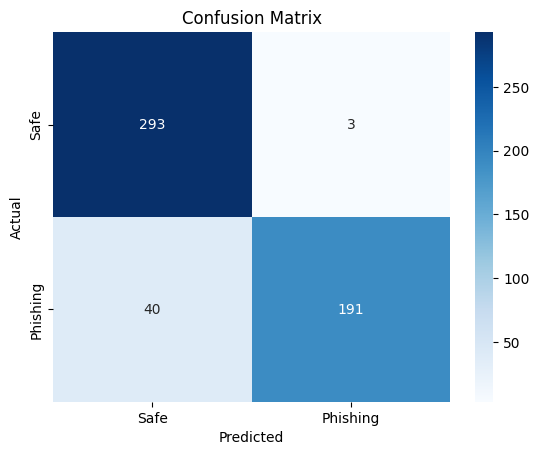

In [25]:
# Step 6: Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Print performance metrics
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Precision:", precision_score(y_test, y_pred))
print("🔍 Recall:", recall_score(y_test, y_pred))
print("🔍 F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Step 7: Predict custom email examples

def predict_email(text):
    # Transform the input text using the same TF-IDF vectorizer
    vector = vectorizer.transform([text])

    # Predict using the trained model
    prediction = model.predict(vector)[0]

    # Map prediction to label
    label = "Phishing Email" if prediction == 1 else "Safe Email"
    return label

# 🔍 Try a few examples
examples = [
    "Congratulations! You have won a free iPhone. Click here to claim your prize.",
    "Hi team, the meeting is rescheduled to 3 PM tomorrow. Please update your calendars.",
    "Urgent: Your account has been compromised. Login now to secure it.",
    "click hear to change password"

]

for i, email in enumerate(examples, 1):
    print(f"Example {i}: {predict_email(email)}\n→ {email}\n")


Example 1: Phishing Email
→ Congratulations! You have won a free iPhone. Click here to claim your prize.

Example 2: Safe Email
→ Hi team, the meeting is rescheduled to 3 PM tomorrow. Please update your calendars.

Example 3: Phishing Email
→ Urgent: Your account has been compromised. Login now to secure it.

Example 4: Phishing Email
→ click hear to change password



In [31]:
# Step 8: Create an interactive GUI for phishing email prediction

import ipywidgets as widgets
from IPython.display import display, clear_output

# Input textbox for email content
email_input = widgets.Textarea(
    value='',
    placeholder='Paste your email subject + body here...',
    description='Email Text:',
    layout=widgets.Layout(width='100%', height='150px'),
    style={'description_width': 'initial'}
)

# Button to trigger prediction
predict_button = widgets.Button(
    description='Check Email',
    button_style='info',
    tooltip='Click to predict',
    icon='search'
)

# Output display
output = widgets.Output()

# Prediction function
def on_predict_clicked(b):
    with output:
        clear_output()
        email_text = email_input.value
        if email_text.strip() == "":
            print("⚠️ Please enter email text.")
        else:
            vector = vectorizer.transform([email_text])
            prediction = model.predict(vector)[0]
            label = "🚨 Phishing Email" if prediction == 1 else "✅ Safe Email"
            print(f"🔍 Prediction: {label}")

# Attach the function to the button
predict_button.on_click(on_predict_clicked)

# Display everything
display(email_input, predict_button, output)


Textarea(value='', description='Email Text:', layout=Layout(height='150px', width='100%'), placeholder='Paste …

Button(button_style='info', description='Check Email', icon='search', style=ButtonStyle(), tooltip='Click to p…

Output()